**Bildklassifikation mit einem neuronalen Netz**

Tutorial von:
https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

In [1]:
# benötige Bilbliotheken
import torch
from torchvision import models
from PIL import Image
from torchvision import transforms


# Funktion zur Vorverarbeitung der Bilder: Damit das Netz Bilder einlesen kann, müssen diese transformiert werden:
#    Anpassung der Größe (256 x 256 Pixel)
#    Rand wegschneiden (Bildgröße: 224×224 Pixel)
#    Anpassung des Datentypes (Tensor)
#    Normalisierung des Bildes, für jede der 3 Schichten (RGB)
transform = transforms.Compose([            
	 transforms.Resize(256),                    
	 transforms.CenterCrop(224),                
	 transforms.ToTensor(),                     
	 transforms.Normalize(                      
	 mean=[0.485, 0.456, 0.406],                
	 std=[0.229, 0.224, 0.225]                  
	 )])


# Lade vortrainiertes Netz
alexnet = models.alexnet(pretrained=True)

#print(alexnet)

# Setze das Modell in den Auswertungsmodus
alexnet.eval();


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [2]:
# Upload von lokalen Daten (von der eigenen Festplatte)
from google.colab import files
upload = files.upload()

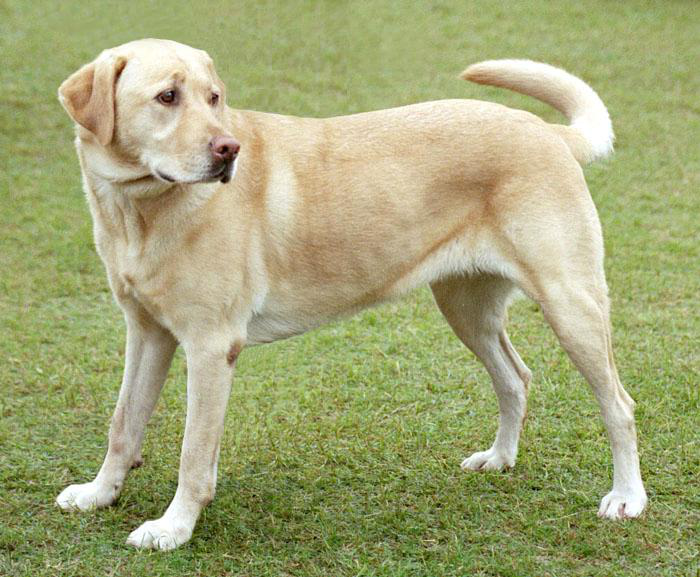

In [ ]:
img = Image.open("dog.jpg")
display(img)


In [ ]:
# Vorverarbeitung des Bildes (Transformation und Hinzufügen einer weiteren Dimension)
img_t = transform(img)
img_in = torch.unsqueeze(img_t, 0)

# Ausgabe der Bildgröße vorher und nachher
print('Größe des Orginalbildes: ',img.size)
print('Größe des transformierten Bildes: ', img_in.size())

Größe des Orginalbildes:  (700, 577)
Größe des transformierten Bildes:  torch.Size([1, 3, 224, 224])


In [ ]:
# Klassifizierung des Bildes durch das Netz
out = alexnet(img_in)
print('Größe des Netzoutputs: ',out.shape)

Größe des Netzoutputs:  torch.Size([1, 1000])


In [ ]:
# Auslesen der Klassen zur Übersetzung der Netzausgabe (Netz gibt nur eine 'Liste' an Zahlen zurück, jeder Eintrag in der Liste entspricht der Wahrscheinlichkeit dieser Klasse zuzugehören)
with open('imagenet_classes.txt') as f:
	  labels = [line.strip() for line in f.readlines()]

# finde Netzoutput mit höchstem Wert
_, index = torch.max(out, 1)

# berechen Wahrscheinlichkeit der gewählten Klasse
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

# gib Klasse und zugehörige Wahrscheinlichkeit aus
print(labels[index[0]], percentage[index[0]].item())

208: 'Labrador retriever', 41.58518600463867


In [ ]:
# sortiere Netzoutput in absteigender Reihenfolge
_, indices = torch.sort(out, descending=True)

# gib die ersten 5 Klassen und deren Wahrscheinlichkeit an
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


[("208: 'Labrador retriever',", 41.58518600463867),
 ("207: 'golden retriever',", 16.59165382385254),
 ("176: 'Saluki, gazelle hound',", 16.28687286376953),
 ("172: 'whippet',", 2.853912115097046),
 ("173: 'Ibizan hound, Ibizan Podenco',", 2.3924756050109863)]

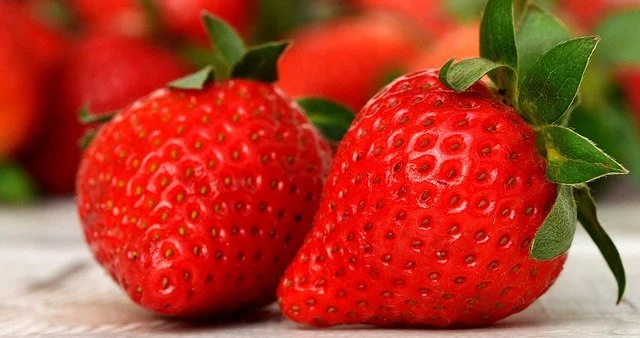

In [ ]:
# Ein neuer Versuch
img = Image.open("strawberries.webp")
#img = Image.open("juri_green.jpg")
#img = Image.open("juri_snow.jpg")
#img = Image.open("kimba_snow.jpg")
#img = Image.open("kimba_green.jpg")
display(img)

In [ ]:
# Bildtransformation
img_t = transform(img)
img_in = torch.unsqueeze(img_t, 0)

# Netzauswertung
out = alexnet(img_in)

# Ausgabe der 5 wahrscheinlichsten Klassen
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("949: 'strawberry',", 99.9940185546875),
 ("954: 'banana',", 0.0009632965666241944),
 ("950: 'orange',", 0.0007944843964651227),
 ("956: 'custard apple',", 0.0007610411266796291),
 ("951: 'lemon',", 0.0006506979116238654)]